In [31]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hmean as HMP
from statsmodels.stats.multitest import fdrcorrection as FDR_BH

## HMQ

In [35]:
ca_prots = ['CBP', 'CBX3', 'CHD4', 'CHD7', 'DNMT1', 'EWSR1', 'EZH2', 'FUS', 'GTF2F1', 
            'HLTF', 'HNRNPH', 'HNRNPL', 'HNRNPUL1', 'ILF3', 'MORC2', 
            'NONO', 'PCAF','RBFOX2', 'RBM15', 'SAFB', 'SAFB2', 'SUZ12',
            'TAF15', 'U2AF2', 'ZC3H11A']
ca_prots = ['CBP', 'CBX3', 'CHD1', 'CHD4', 'CHD7', 'CTCF', 'EWSR1', 'EZH2', 'GTF2F1', 
            'HDAC1', 'HNRNPK', 'HNRNPUL1', 'LARP7', 'LSD1', 'MORC2', 'NUP98', 'PCBP1', 
            'PHF8', 'PTBP1', 'RBBP5', 'RBFOX2', 'RBM22', 'TAF15', 'TARDBP', 'U2AF1', 
            'WDR5', 'ZC3H11A', 'ZC3H8']

print(len(ca_prots))
# - HDAC1, HNRNPC, 
# + NUP98, PTBP1, U2AF1

cols = ["dna_chr", "dna_start", "dna_end", "rna_chr", "rna_start",
           "rna_end", "rna_strand", "rna_name", "rna_type", "bardic_pval",
           "bardic_qval", "macs_pval", "macs_qval", "piranha_pval",
           "piranha_qval", "dna_intersect", "rna_intersect", "scaling_weight"]
dt_cols = {k:v for k, v in enumerate(cols)}

lst = glob.glob("../DATA_TRIADS/TRIADS/RNA_WINDOW_100_DNA_WINDOW_2000/*HMP")
ca_files = list(filter(lambda x: x.split('/')[-1].split('.')[0] in ca_prots, lst))
rename_dct = {i : col for i, col in enumerate(cols)}
eps = 1e-20

for FILE in glob.glob("../DATA_TRIADS/TRIADS_november_actual/no_protein_coding/RNA_WINDOW_100_DNA_WINDOW_2000/*bed"):
    #preproc
    df = pd.read_csv(FILE, sep='\t', header=None)
    df = df.rename(columns = rename_dct)
    df["macs_pval"] = df.macs_pval.transform(lambda x: 10**(-x))
    df["macs_qval"] = df.macs_qval.transform(lambda x: 10**(-x))
    df = df.iloc[:, [*range(0,9),10,12,14,17]]
    df["HMQ"] = HMP(list(zip(df.bardic_qval, df.macs_qval, df.piranha_qval)), axis = 1)
    df["HMQ"] = df.HMQ.apply(lambda x: -np.log10(x + eps))
    df = df.iloc[:, [*range(0,9), 13, 12]] #unplug 14 to fix later
    # write file
    NEW_FNAME = "HMQ." + FILE.split('/')[-1]
    df.to_csv(f"/home/daniil/Desktop/bioinformatics_group/june/11_ca_proteins_graphs/{NEW_FNAME}", 
              sep='\t', index = False, header = False)

28


In [3]:
! head HMQ.CBP.redc_K562.bed.fRIP.K562.bed -n 1

chr10	126143341	126143365	chr9	35657756	35657778	+	RMRP_2	ribozyme	8.340096611609145	1.13692215261695


In [36]:
cols = ["dna_chr", "dna_start", "dna_end", "rna_chr", "rna_start",
           "rna_end", "rna_strand", "rna_name", "rna_type", "HMQ", "scaling"]
dt_cols = {k:v for k, v in enumerate(cols)}

nca_files = list(filter(lambda x: not x.split('/')[1].split('.')[1] in ca_prots, glob.glob("./HMQ*K562*")))
nca_files = list(filter(lambda x: x.endswith(".bed"), nca_files))
hmqs_nca = []
for file in nca_files:
    org = file.split('.')[-2]
    df = pd.read_csv(file, sep='\t', header=None).rename(columns=dt_cols).HMQ
    hmqs_nca.extend(df.values)
    
ca_files = list(filter(lambda x: x.split('/')[2].split('.')[1] in ca_prots, glob.glob("./tmp/HMQ*K562*")))
print(ca_files)
print(len(ca_files))
hmqs = []
for file in ca_files:
    org = file.split('.')[-2]
    df = pd.read_csv(file, sep='\t', header=None).rename(columns=dt_cols).HMQ
    hmqs.extend(df.values)

['./tmp/HMQ.ZC3H8.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.MORC2.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.RBFOX2.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.ZC3H11A.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.PHF8.redc_K562.bed.fRIP.K562.bed', './tmp/HMQ.EWSR1.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.CHD1.redc_K562.bed.fRIP.K562.bed', './tmp/HMQ.RBBP5.redc_K562.bed.fRIP.K562.bed', './tmp/HMQ.CBX3.redc_K562.bed.fRIP.K562.bed', './tmp/HMQ.LARP7.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.CTCF.redc_K562.bed.fRIP.K562.bed', './tmp/HMQ.CHD4.redc_K562.bed.fRIP.K562.bed', './tmp/HMQ.U2AF1.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.PTBP1.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.HNRNPUL1.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.CHD7.redc_K562.bed.fRIP.K562.bed', './tmp/HMQ.TARDBP.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.HNRNPK.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.PCBP1.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.GTF2F1.redc_K562.bed.eCLIP.K562.bed', './tmp/HMQ.NUP98.redc_K562.bed.fRIP.K562.be

<Axes: xlabel='assoc', ylabel='-log(HMQ)'>

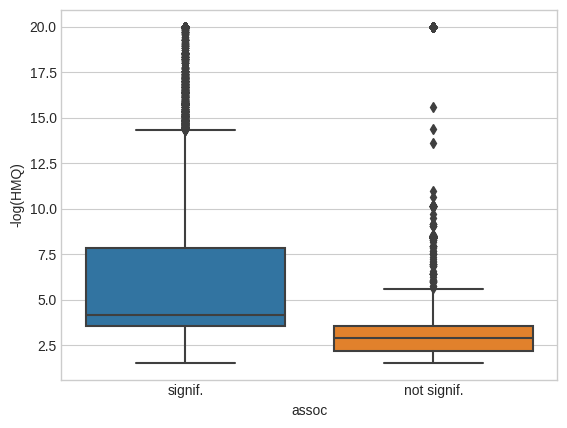

In [37]:
import seaborn as sns
ca = pd.DataFrame(zip(hmqs, ["signif."] * len(hmqs)))
nca = pd.DataFrame(zip(hmqs_nca, ["not signif."] * len(hmqs_nca)))

drawing = pd.concat([ca, nca]).rename(columns={0:"-log(HMQ)", 1:"assoc"})
sns.boxplot(data = drawing, y = "-log(HMQ)", x = "assoc")

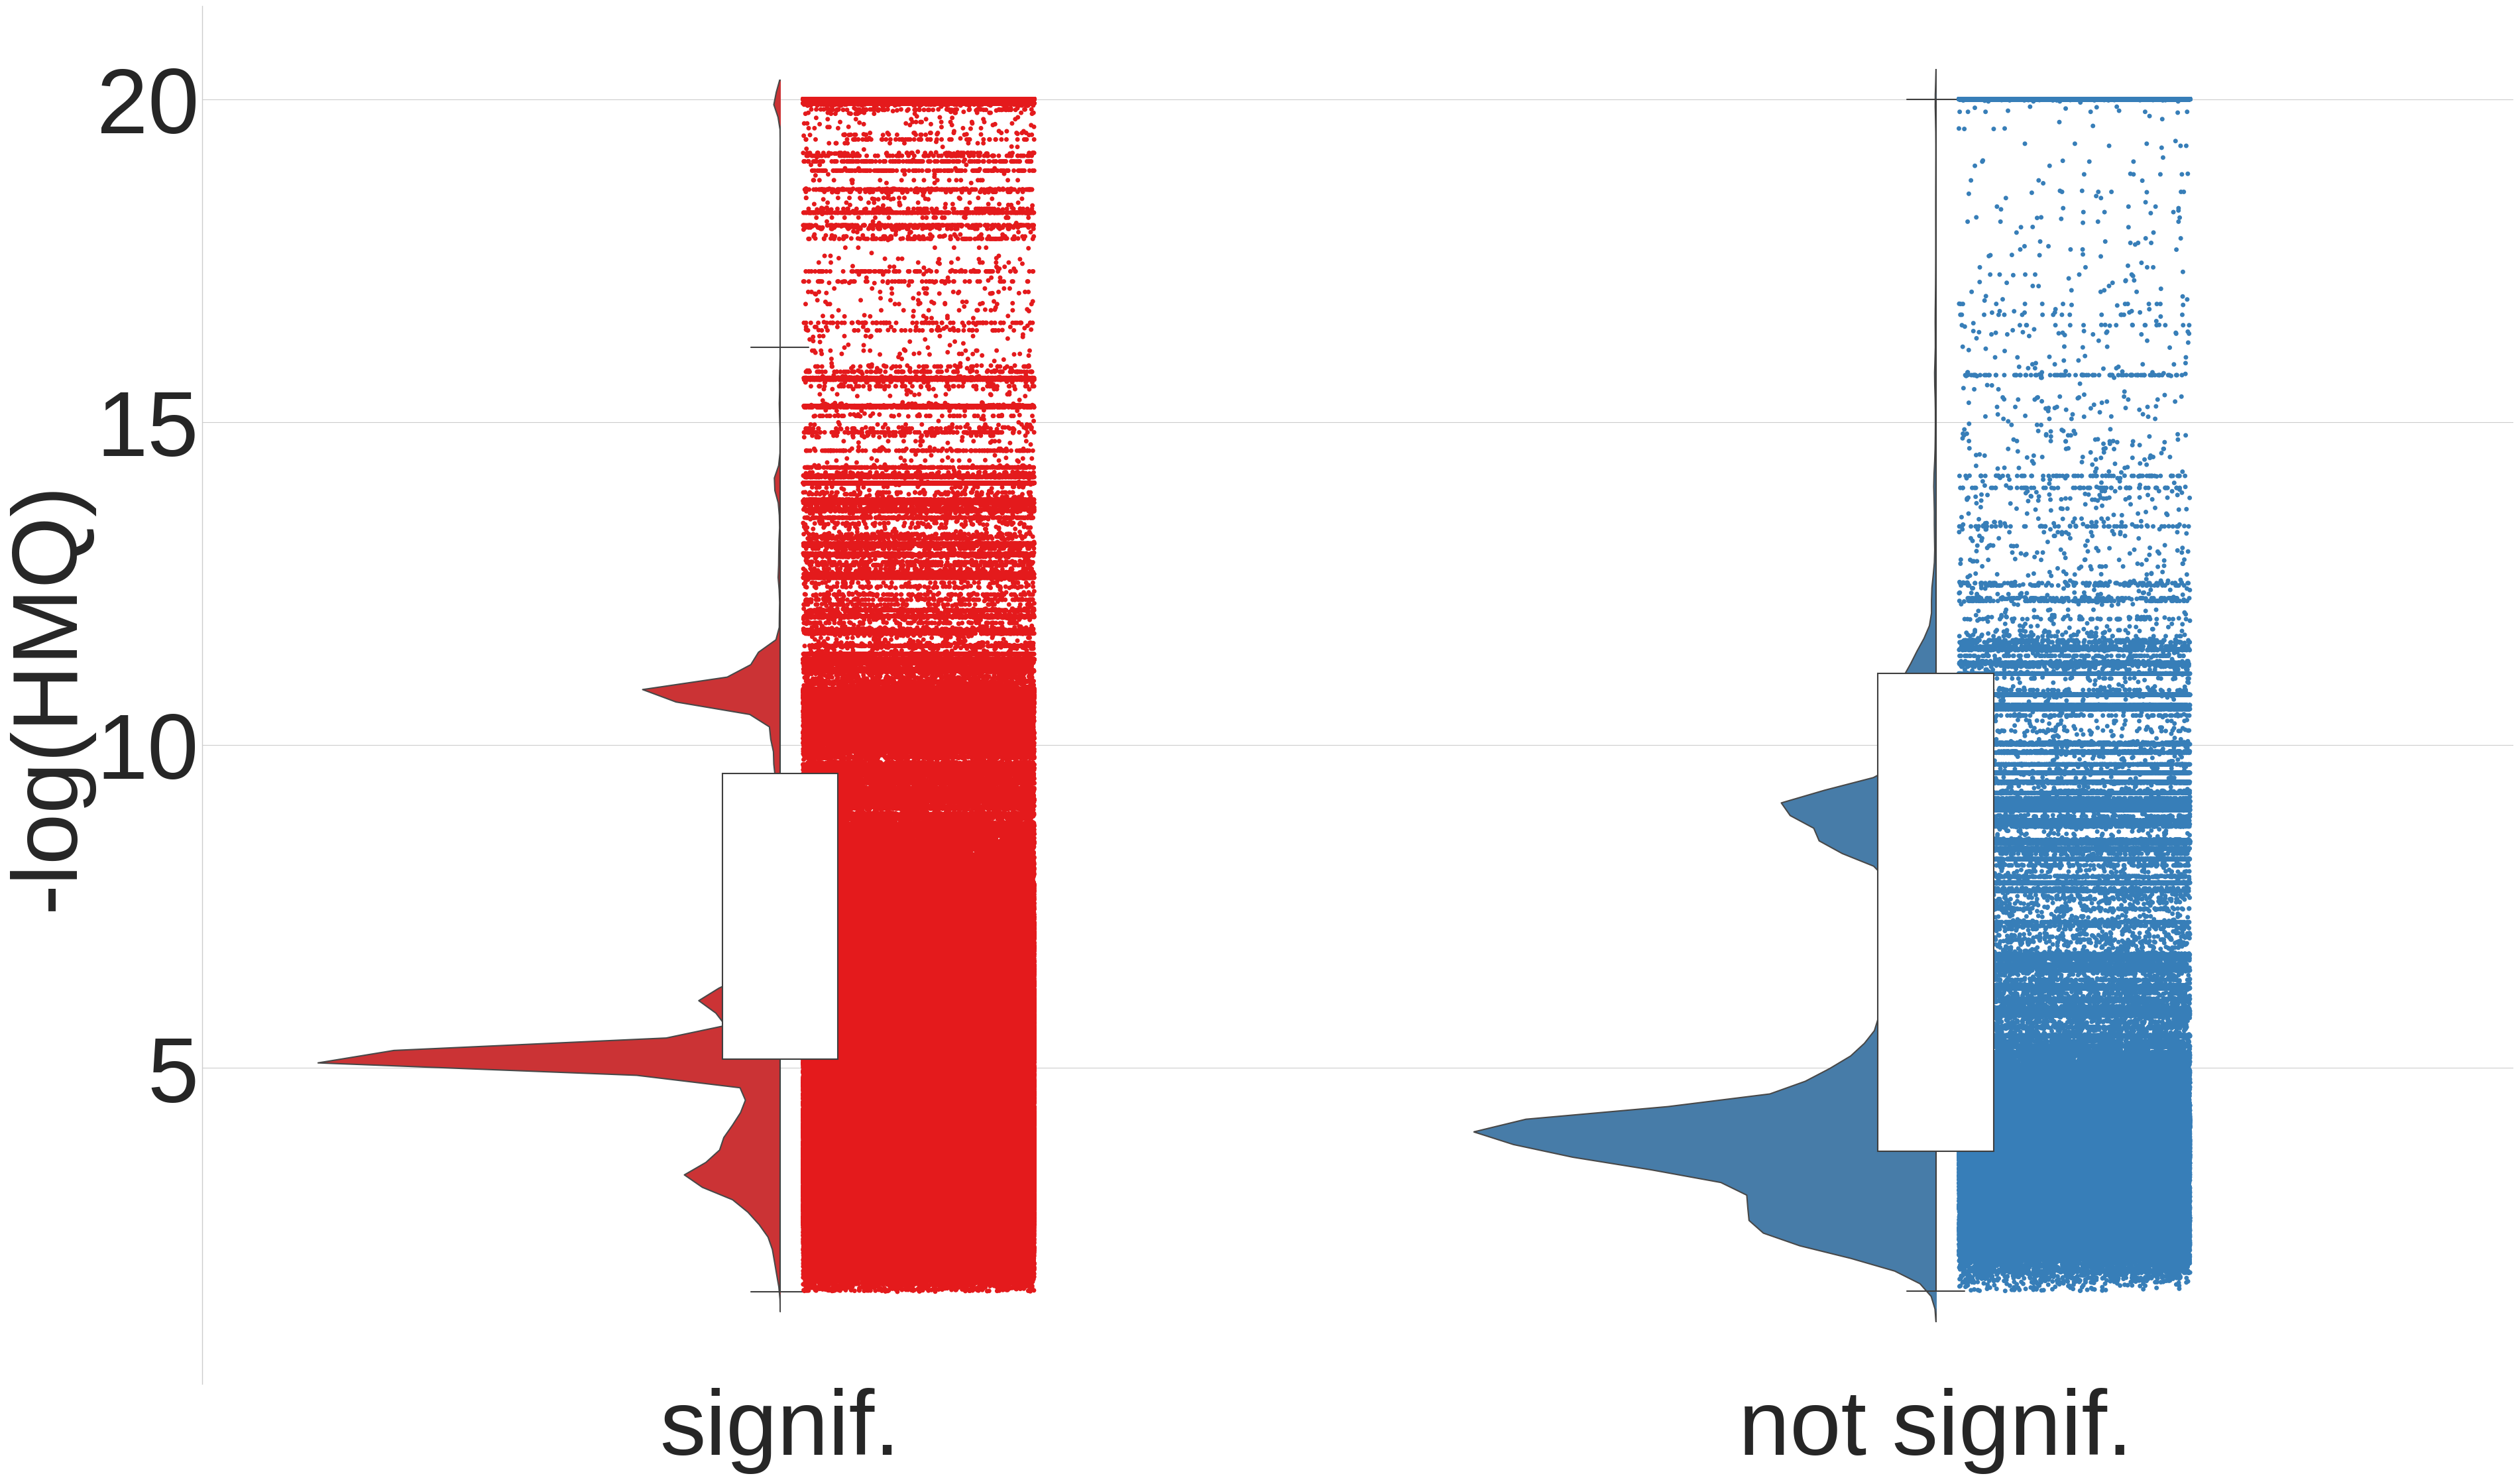

In [28]:
sns.set_style('white')
palette = 'Set1'
plt.figure(figsize=(45,27))
plt.style.use("seaborn-v0_8-whitegrid")
ax = sns.violinplot(x="assoc", y="-log(HMQ)", data=drawing[drawing["-log(HMQ)"] < 20], hue="assoc", dodge=False,
                    palette=palette,
                    scale="width", inner=None)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

ax.set_alpha(0.6)
sns.boxplot(x="assoc", y="-log(HMQ)", data=drawing, saturation=1, showfliers=False,
            width=0.1, boxprops={'zorder': 4, 'facecolor': 'white'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(x="assoc", y="-log(HMQ)", data=drawing, hue="assoc", palette=palette, dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=100)
ax.legend_.remove()
plt.xlabel("")
plt.ylabel('-log(HMQ)', fontsize=100)
plt.show()

In [24]:
from scipy.stats import mannwhitneyu as MWU

assoc = drawing.query("assoc == 'signif.'")["-log(HMQ)"].values
nonassoc = drawing.query("assoc == 'not signif.'")["-log(HMQ)"].values

MWU(assoc, nonassoc)

MannwhitneyuResult(statistic=162407470747.5, pvalue=0.0)

## Scaling weights

In [14]:
cols = ["dna_chr", "dna_start", "dna_end", "rna_chr", "rna_start",
           "rna_end", "rna_strand", "rna_name", "rna_type", "HMQ", "scaling"]
dt_cols = {k:v for k, v in enumerate(cols)}

nca_files = list(filter(lambda x: not x.split('/')[1].split('.')[1] in ca_prots, glob.glob("./HMQ*")))
nca_files = list(filter(lambda x: x.endswith(".bed"), nca_files))
hmqs_nca = []
for file in nca_files:
    org = file.split('.')[-2]
    df = pd.read_csv(file, sep='\t', header=None).rename(columns=dt_cols).scaling
    hmqs_nca.extend(df.values)
    
ca_files = list(filter(lambda x: x.split('/')[1].split('.')[1] in ca_prots, glob.glob("./HMQ*")))

hmqs = []
for file in ca_files:
    org = file.split('.')[-2]
    df = pd.read_csv(file, sep='\t', header=None).rename(columns=dt_cols).scaling
    hmqs.extend(df.values)

<Axes: xlabel='assoc', ylabel='scaling'>

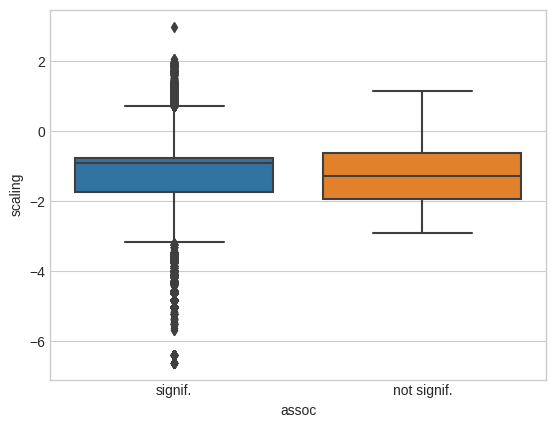

In [32]:
import seaborn as sns
ca = pd.DataFrame(zip(hmqs, ["signif."] * len(hmqs)))
nca = pd.DataFrame(zip(hmqs_nca, ["not signif."] * len(hmqs_nca)))

drawing = pd.concat([ca, nca]).rename(columns={0:"scaling", 1:"assoc"})
#drawing.loc[drawing["scaling"] > 200, "scaling"] = np.mean(drawing.scaling)
drawing["scaling"] = np.log10(drawing["scaling"])
drawing = drawing.drop(drawing[np.abs(drawing["scaling"]) < 0.5].index)
sns.boxplot(data = drawing, y = "scaling", x = "assoc")

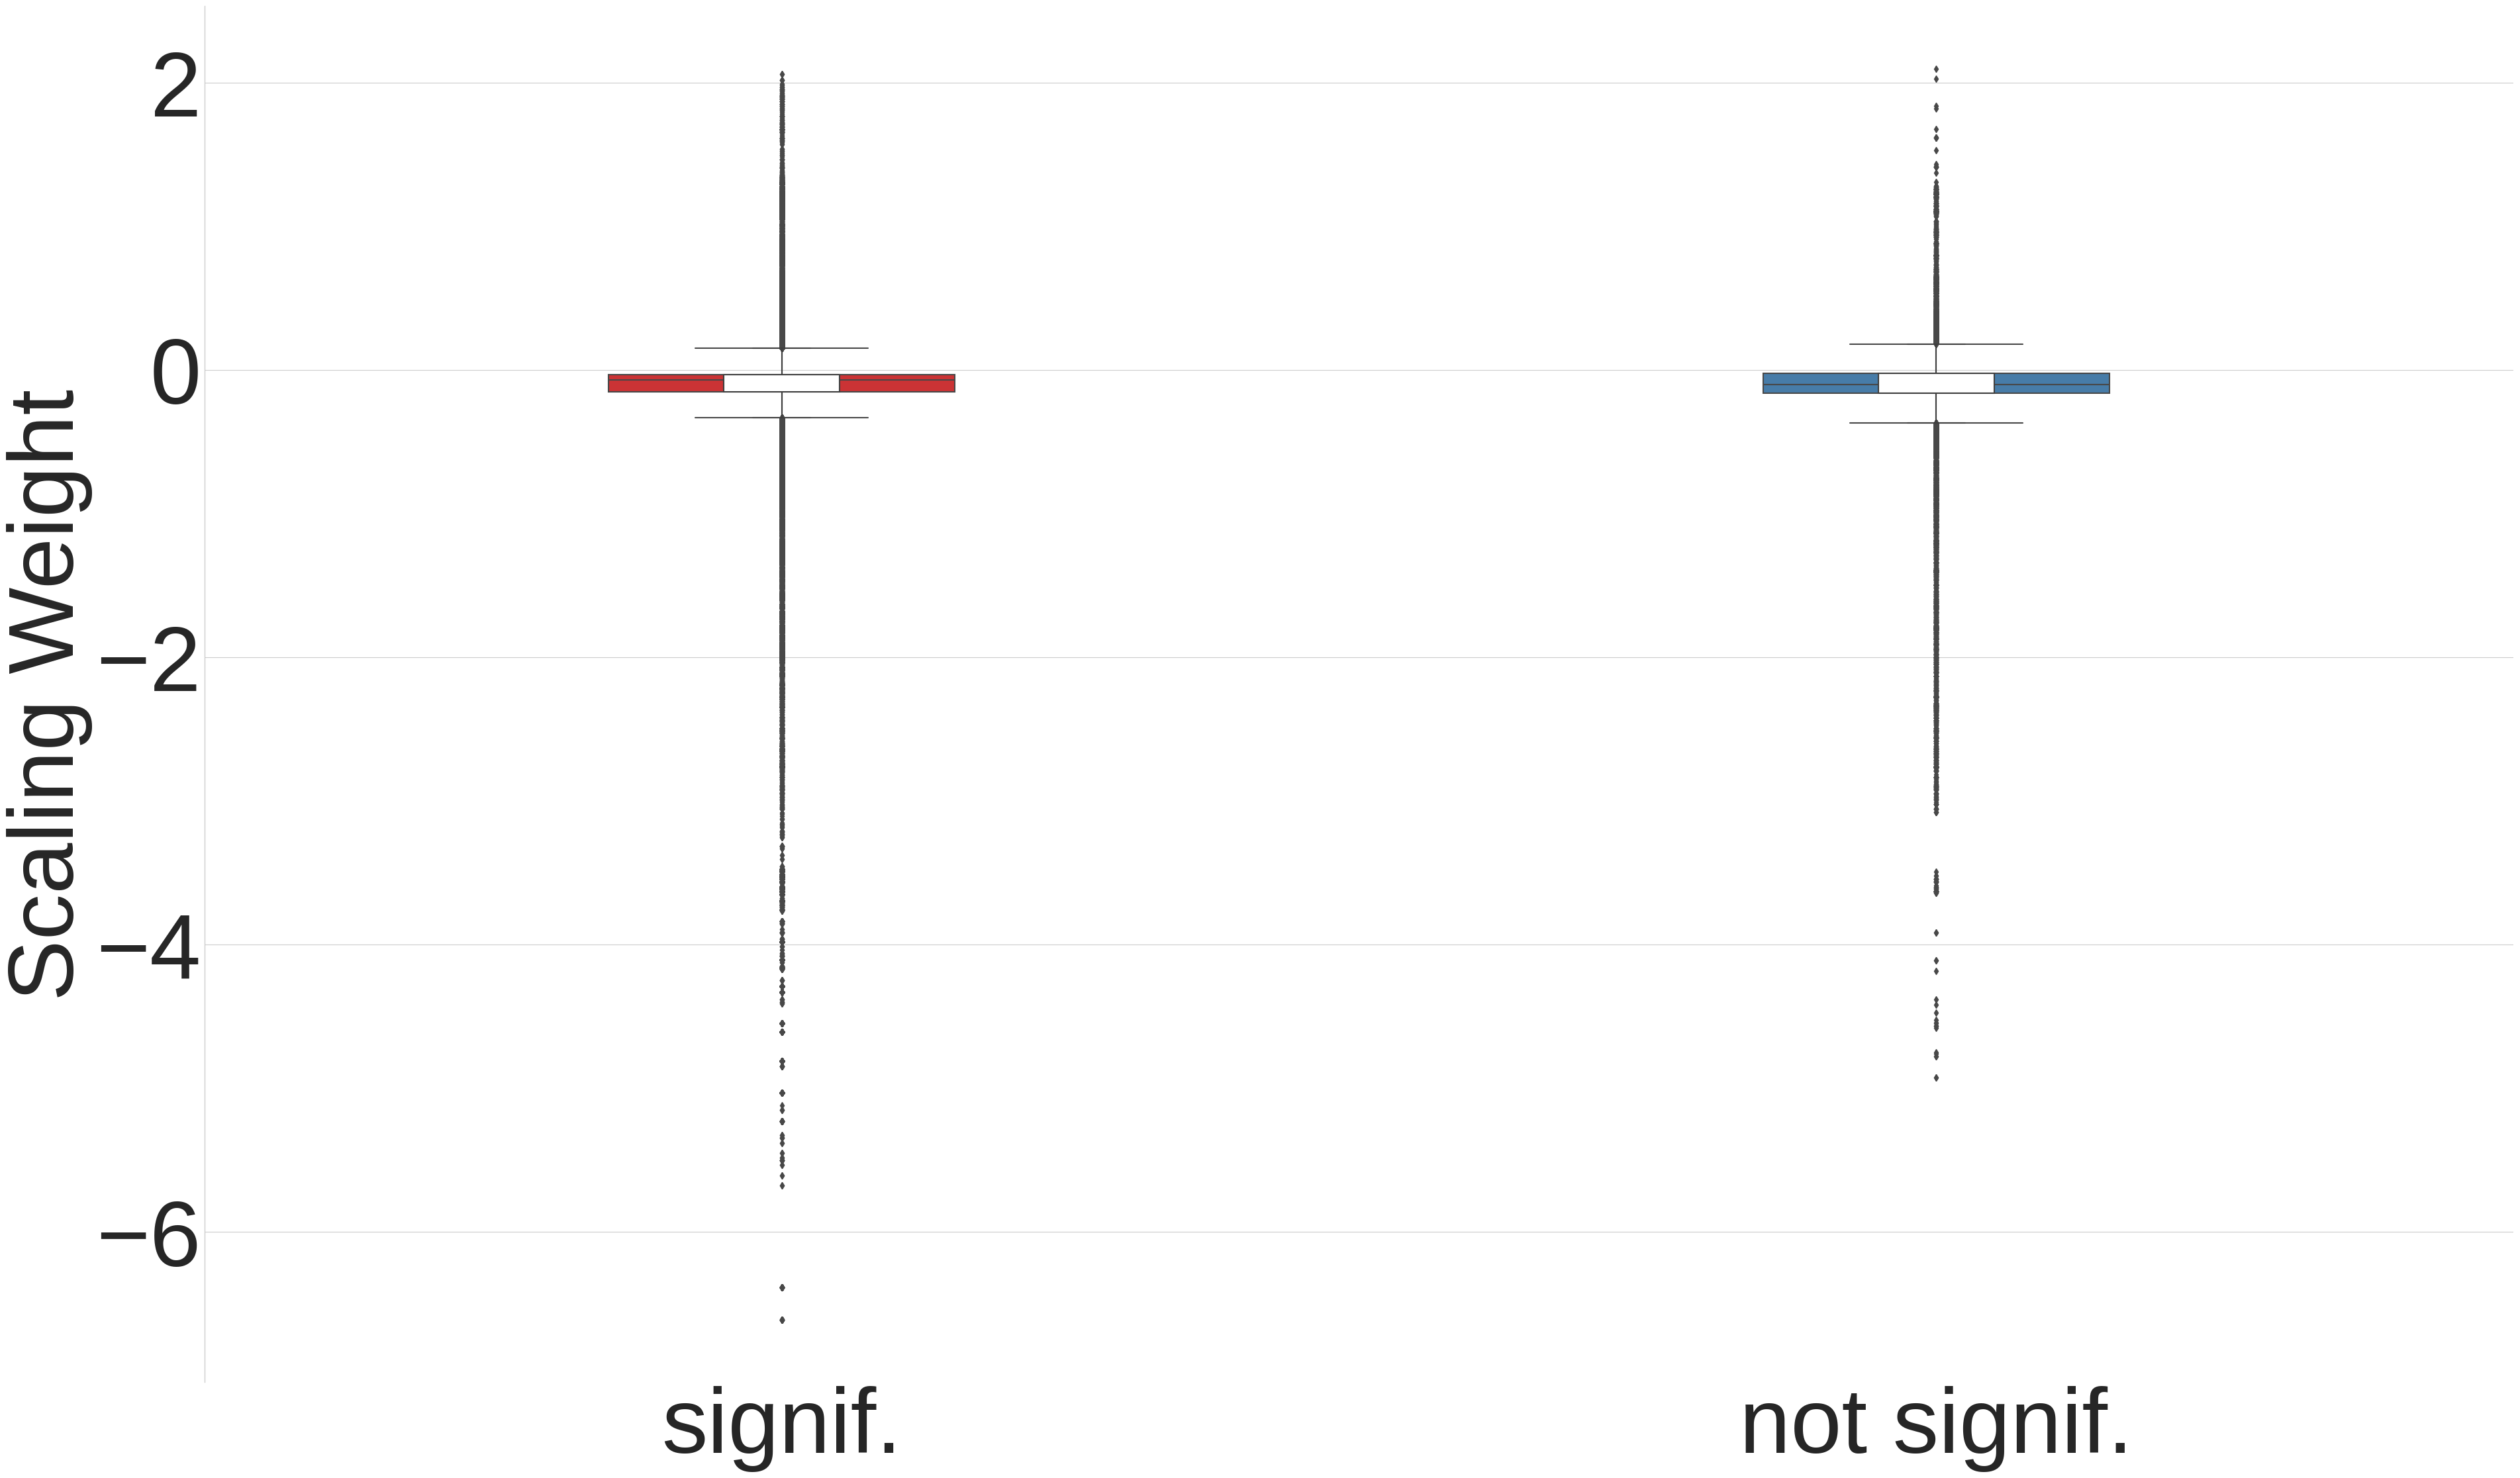

In [27]:
sns.set_style('white')
palette = 'Set1'
plt.figure(figsize=(45,27))
plt.style.use("seaborn-v0_8-whitegrid")
ax = sns.boxplot(x="assoc", y="scaling", data=drawing, hue="assoc", dodge=False,
                    palette=palette, width=0.3
                   # inner=None
                )
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

ax.set_alpha(0.6)
sns.boxplot(x="assoc", y="scaling", data=drawing, saturation=1, showfliers=False,
            width=0.1, boxprops={'zorder': 4, 'facecolor': 'white'}, ax=ax)
old_len_collections = len(ax.collections)
#sns.stripplot(x="assoc", y="scaling", data=drawing, hue="assoc", palette=palette, dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=100)
ax.legend_.remove()
plt.xlabel("")
plt.ylabel('Scaling Weight', fontsize=100)
plt.show()

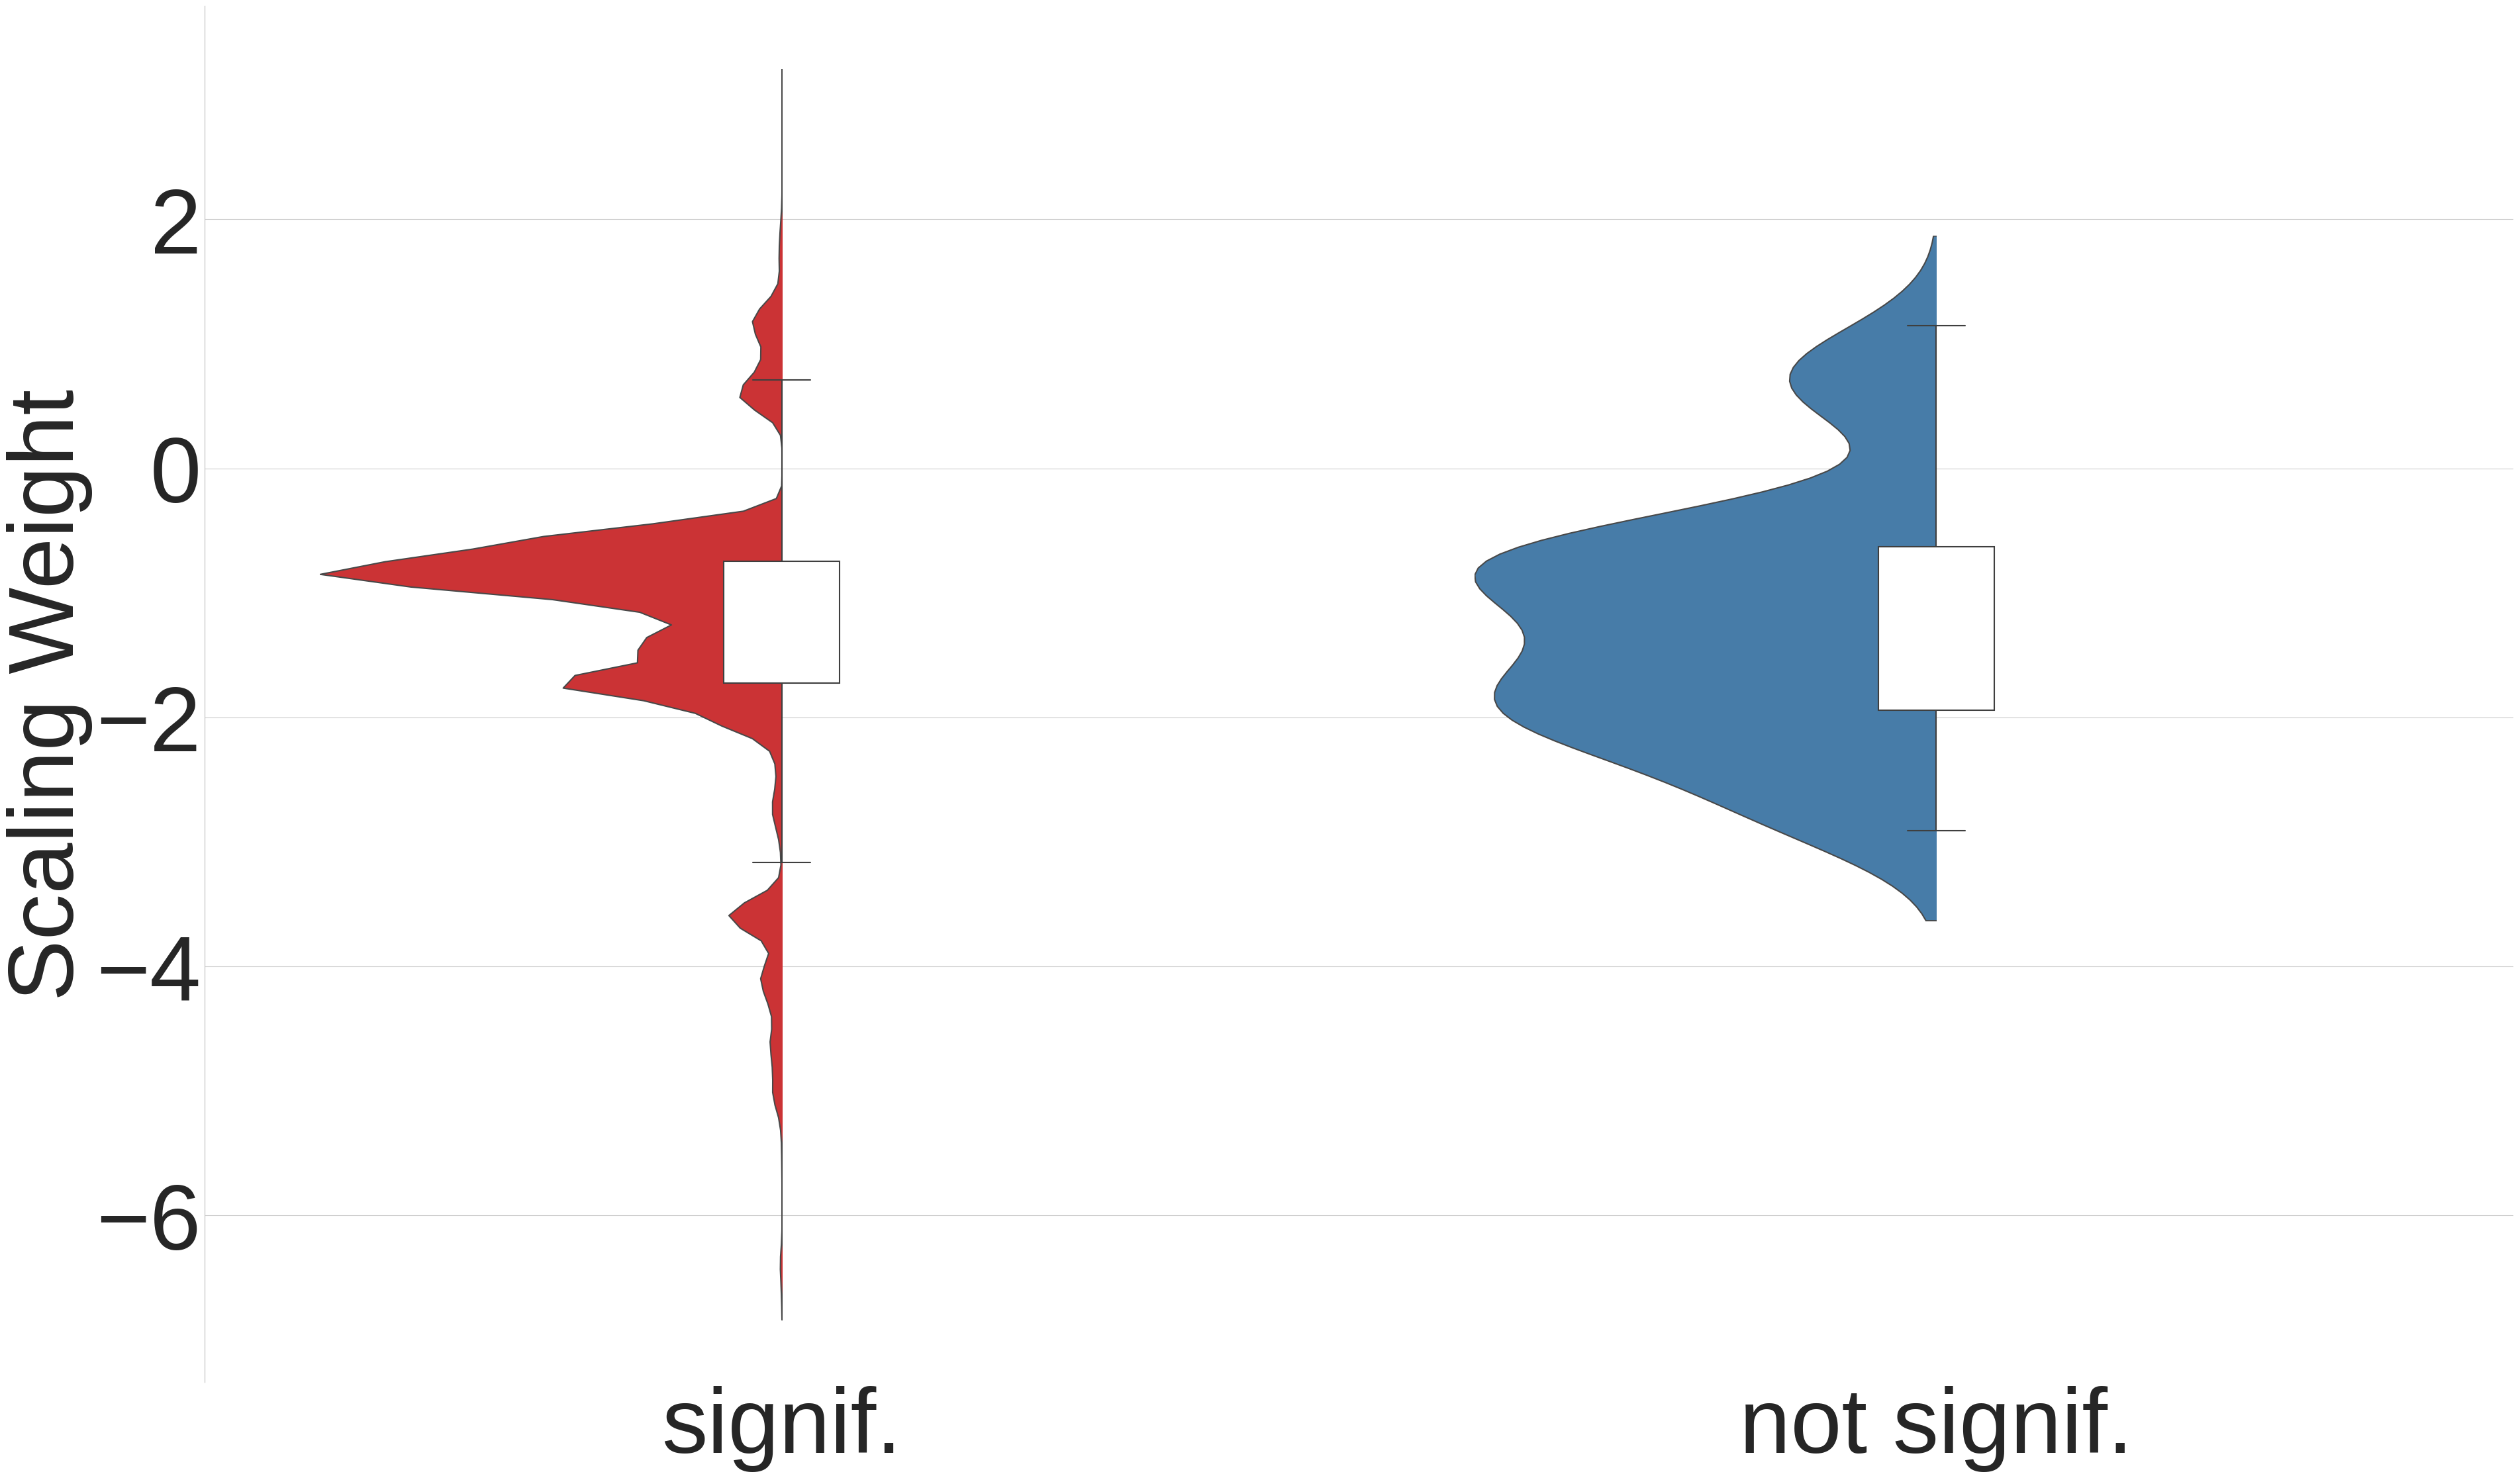

In [33]:
sns.set_style('white')
palette = 'Set1'
plt.figure(figsize=(45,27))
plt.style.use("seaborn-v0_8-whitegrid")
ax = sns.violinplot(x="assoc", y="scaling", data=drawing, hue="assoc", dodge=False,
                    palette=palette, scale='width', inner=None
                )
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

ax.set_alpha(0.6)
sns.boxplot(x="assoc", y="scaling", data=drawing, saturation=1, showfliers=False,
            width=0.1, boxprops={'zorder': 4, 'facecolor': 'white'}, ax=ax)
old_len_collections = len(ax.collections)
#sns.stripplot(x="assoc", y="scaling", data=drawing, hue="assoc", palette=palette, dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=100)
ax.legend_.remove()
plt.xlabel("")
plt.ylabel('Scaling Weight', fontsize=100)
plt.show()

In [19]:
from scipy.stats import mannwhitneyu as MWU

assoc = drawing.query("assoc == 'signif.'")["scaling"].values
nonassoc = drawing.query("assoc == 'not signif.'")["scaling"].values

MWU(assoc, nonassoc)

MannwhitneyuResult(statistic=nan, pvalue=nan)

## Z-score

In [10]:
cols = ["dna_chr", "dna_start", "dna_end", "rna_chr", "rna_start",
           "rna_end", "rna_strand", "rna_name", "rna_type", "HMQ", "scaling"]
dt_cols = {k:v for k, v in enumerate(cols)}

nca_files = list(filter(lambda x: not x.split('/')[1].split('.')[1] in ca_prots, glob.glob("./HMQ*")))
nca_files = list(filter(lambda x: x.endswith(".bed"), nca_files))
hmqs_nca = []
for file in nca_files:
    org = file.split('.')[-2]
    expt = file.split('.')[3]
    df = pd.read_csv(file, sep='\t', header=None).rename(columns=dt_cols).iloc[:, [-4, -3]]
    df["expt"] = f"{expt}"
    hmqs_nca.append(df.iloc[:, [0,2]])
    
ca_files = list(filter(lambda x: x.split('/')[1].split('.')[1] in ca_prots, glob.glob("./HMQ*")))

hmqs = []
for file in ca_files:
    org = file.split('.')[-2]
    expt = file.split('.')[3]
    df = pd.read_csv(file, sep='\t', header=None).rename(columns=dt_cols).iloc[:, [-4, -3]]
    df["expt"] = f"{expt}"
    hmqs.append(df.iloc[:, [0,2]])

In [11]:
nca_proteins_contacts = pd.concat(hmqs_nca)
nca_proteins_contacts["category"] = "non-CA"
ca_proteins_contacts = pd.concat(hmqs)
ca_proteins_contacts["category"] = "CA"
contacts = pd.concat([nca_proteins_contacts, ca_proteins_contacts]).sort_values(by="category")
contacts

,rna_name,expt,category
107089,CT010467.1,radicl2FA_mESC,CA
46400,CT010467.1,radiclNPM_mESC,CA
46399,Snord21,radiclNPM_mESC,CA
46398,Snord21,radiclNPM_mESC,CA
46397,CT010467.1,radiclNPM_mESC,CA
...,...,...,...
1225,U2_728,redc_K562,non-CA
1224,MTND4P12,redc_K562,non-CA
1223,MTND4P12,redc_K562,non-CA
1199,U2_728,redc_K562,non-CA


In [12]:
radicl_chp = pd.read_table("../09_fRIP_v_eCLIP/ES_radicl_rnaseqMENCODE.chP.tab")
radicl_chp["experiment"] = "radicl_2FA_mESC"
radicl_chp = radicl_chp.iloc[:, [0,9,13]]
grid_chp = pd.read_table("../09_fRIP_v_eCLIP/ES_grid_rnaseqMENCODE.chP.tab")
grid_chp["experiment"] = "grid_mESC"
grid_chp = grid_chp.iloc[:, [0,9,13]]
redc_chp = pd.read_table("../05_another_assoc_tests/K562_rnaseqART.chP.tab")
redc_chp["experiment"] = "redc_K562"
redc_chp = redc_chp.iloc[:, [0,9,13]]

chp_df = pd.concat([radicl_chp, grid_chp, redc_chp])
chp_df

,gene_name_un,zscore,experiment
0,1110002O04Rik,0.461193,radicl_2FA_mESC
1,1600012P17Rik,1.453865,radicl_2FA_mESC
2,1700001G17Rik,-1.157874,radicl_2FA_mESC
3,1700003I22Rik,1.900422,radicl_2FA_mESC
4,1700007P06Rik,1.094387,radicl_2FA_mESC
...,...,...,...
37839,ZNF75D,0.541820,redc_K562
37840,ZNF81,0.575118,redc_K562
37841,ZRSR2,1.029457,redc_K562
37842,ZXDA,-0.744003,redc_K562


In [13]:
zscore_data = contacts.merge(chp_df, left_on=["rna_name", "expt"], 
                         right_on=["gene_name_un", "experiment"], how='inner')
zscore_data = zscore_data
zscore = zscore_data
zscore

,rna_name,expt,category,gene_name_un,zscore,experiment
0,SNORD58A,redc_K562,CA,SNORD58A,6.832287,redc_K562
1,SNORD58A,redc_K562,CA,SNORD58A,6.832287,redc_K562
2,SNORD58A,redc_K562,CA,SNORD58A,6.832287,redc_K562
3,SNORD58A,redc_K562,CA,SNORD58A,6.832287,redc_K562
4,SNORD58A,redc_K562,CA,SNORD58A,6.832287,redc_K562
...,...,...,...,...,...,...
270918,MCPH1-AS1,redc_K562,non-CA,MCPH1-AS1,1.066974,redc_K562
270919,MCPH1-AS1,redc_K562,non-CA,MCPH1-AS1,1.066974,redc_K562
270920,DSCR4,redc_K562,non-CA,DSCR4,1.034469,redc_K562
270921,DSCR4,redc_K562,non-CA,DSCR4,1.034469,redc_K562


<Figure size 1500x1000 with 0 Axes>

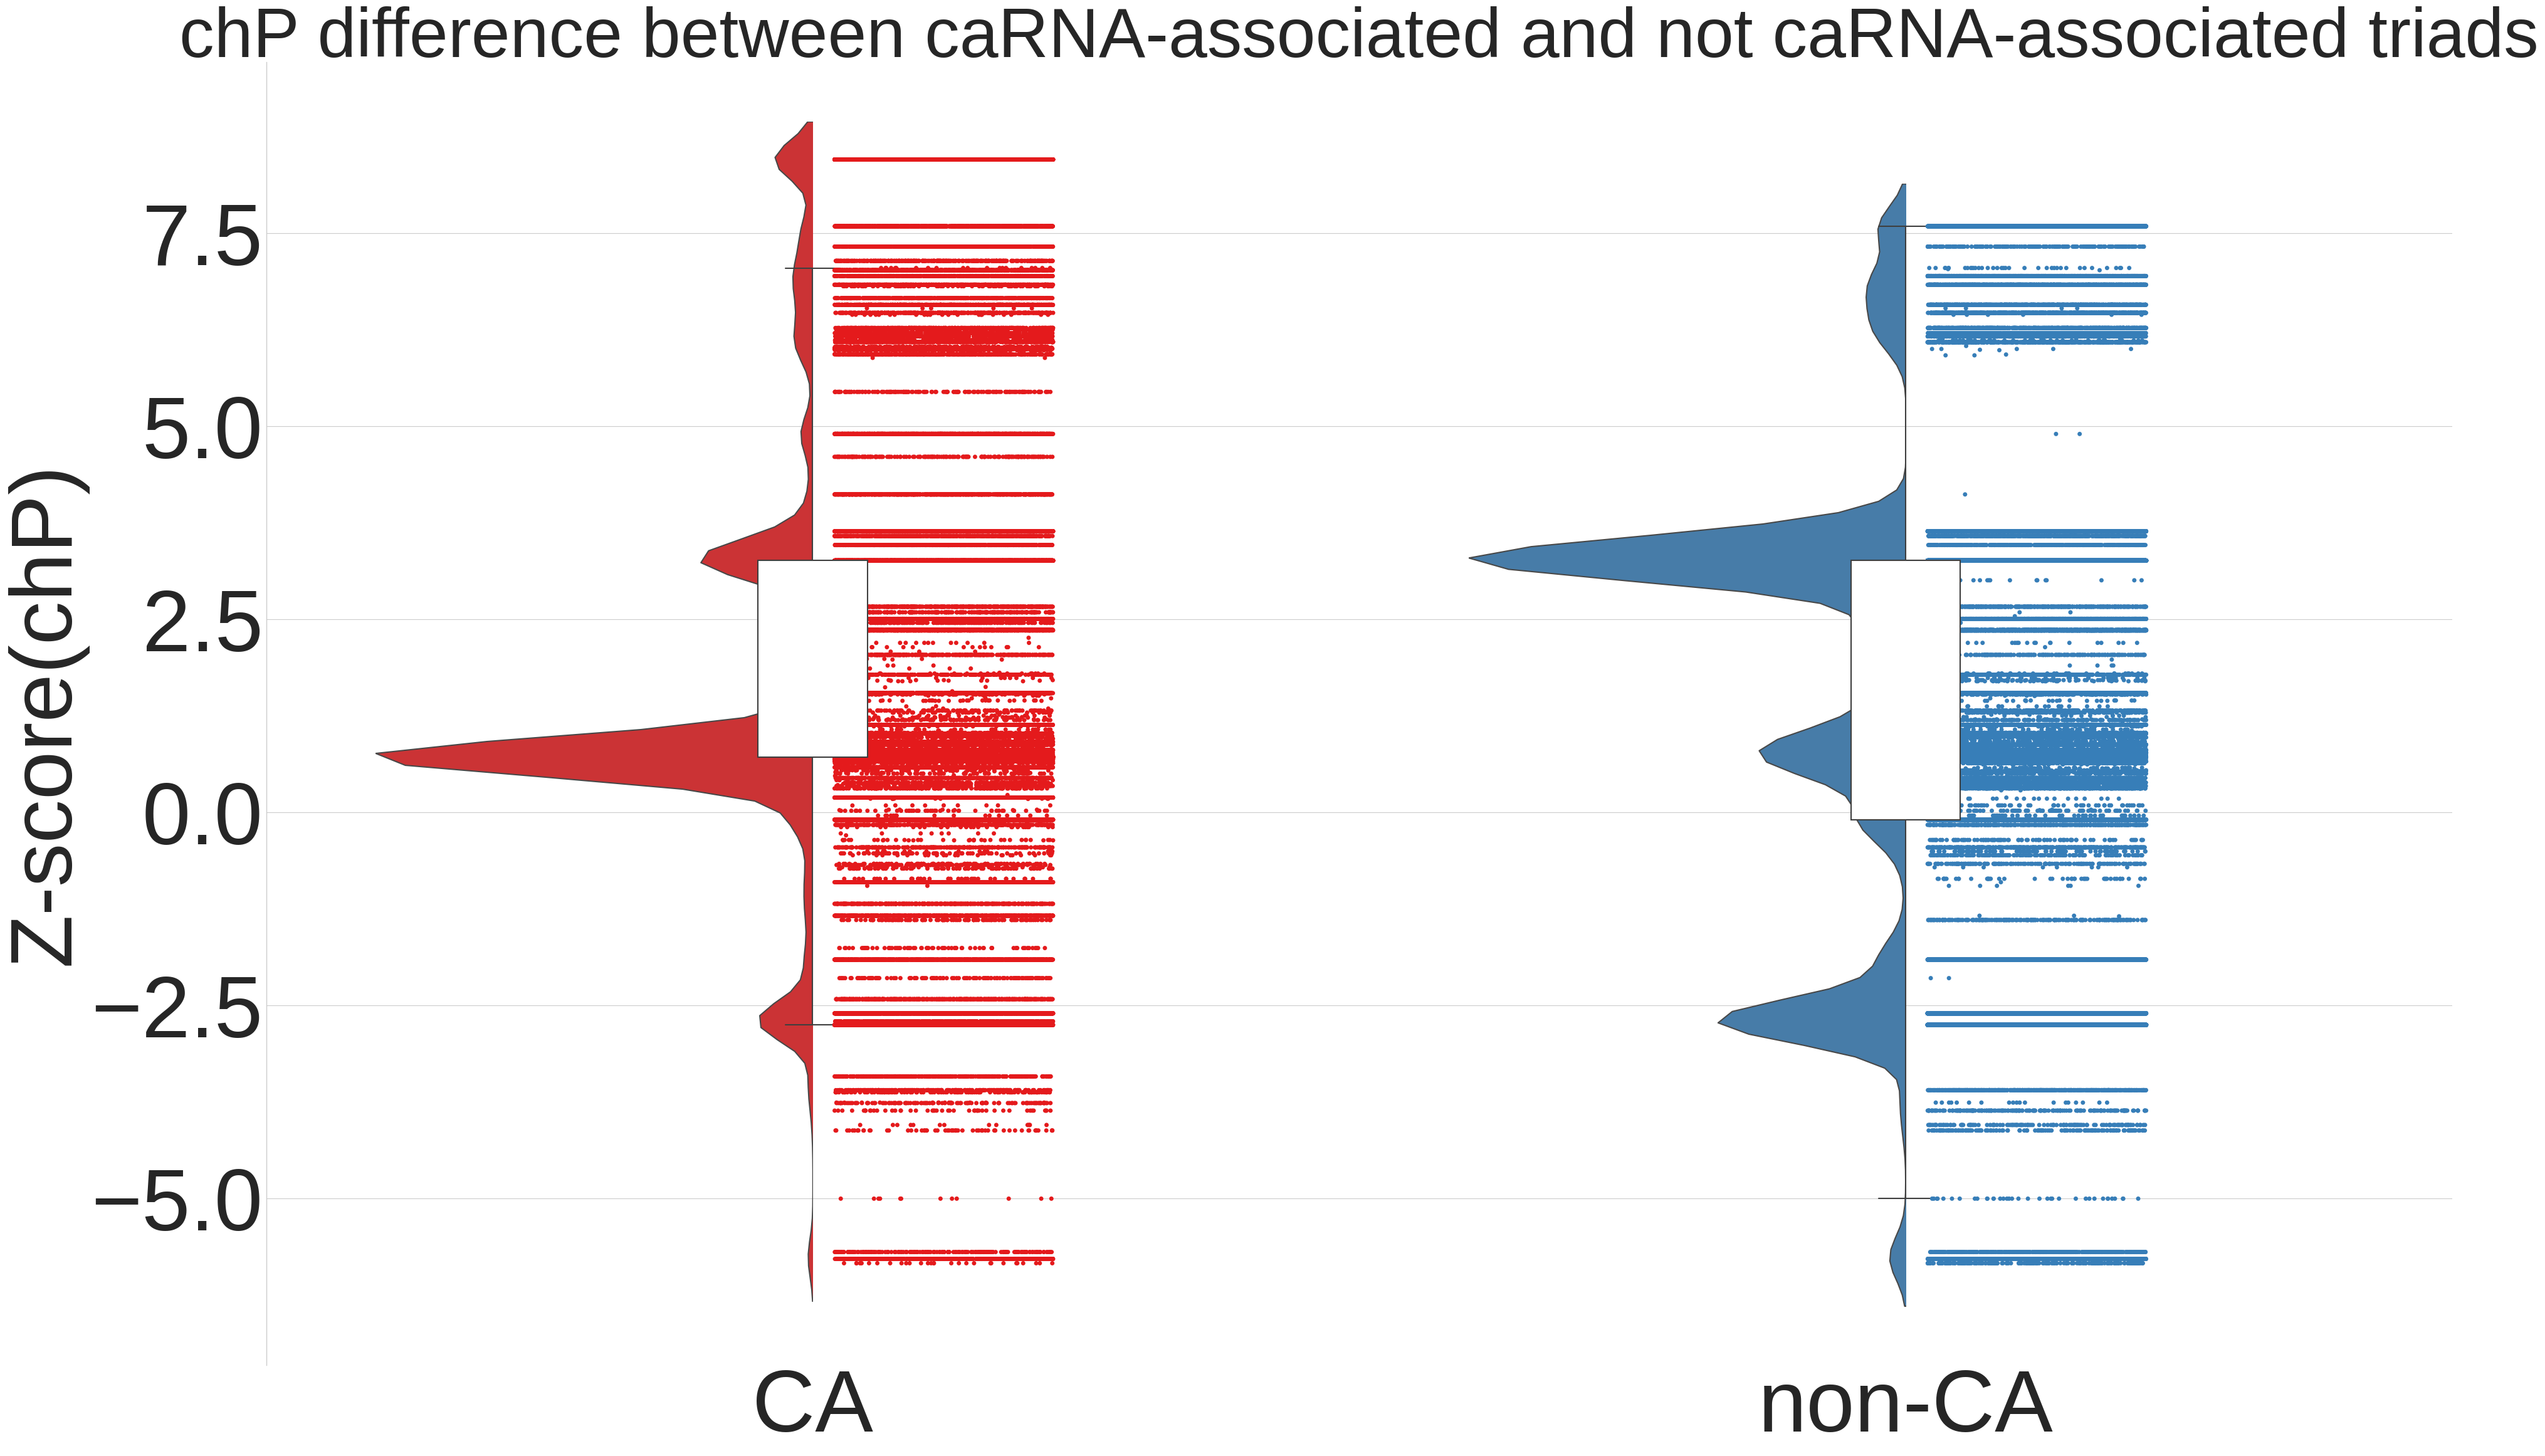

In [19]:
plt.figure(figsize=(15,10))
sns.set_style('white')
palette = 'Set1'
plt.figure(figsize=(45,27))
plt.style.use("seaborn-v0_8-whitegrid")
ax = sns.violinplot(x="category", y="zscore", data=zscore, hue="category", dodge=False,
                    palette=palette,
                    scale="width", inner=None)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))

ax.set_alpha(0.6)
sns.boxplot(x="category", y="zscore", data=zscore, saturation=1, showfliers=False,
            width=0.1, boxprops={'zorder': 4, 'facecolor': 'white'}, ax=ax)
old_len_collections = len(ax.collections)
sns.stripplot(x="category", y="zscore", data=zscore, hue="category", palette=palette, 
              dodge=False, ax=ax)
for dots in ax.collections[old_len_collections:]:
    dots.set_offsets(dots.get_offsets() + np.array([0.12, 0]))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=100)
ax.legend_.remove()
plt.xlabel("")
plt.ylabel('Z-score(chP)', fontsize=100)
plt.title("chP difference between caRNA-associated and not caRNA-associated triads", fontsize=80)
plt.show()